### Task 5 To Explore Business Analytics

## Introduction

We'll use the Sample Super Store dataset for our analysis.

In [1]:
# importing all requiered libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Let's load the CSV files using the Pandas library. We'll use the name `store_df` for the data frame, to indicate that this is unprocessed data that which we might clean, filter and modify to prepare a data frame that's ready for analysis.

In [2]:
# load the dataset
store_df=pd.read_csv('SampleSuperstore.csv')

In [3]:
store_df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


The dataset contains 9994 rows and 13 columns.  


Let's view the list of columns in the data frame. 

In [4]:
store_df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

We've now loaded the dataset, and we're ready to move on to the next step of preprocessing & cleaning the data for our analysis.

Let's view some basic information about the data frame.

In [5]:
# See the first 5 rows
store_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
# See the last 5 rows
store_df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [7]:
# Return a tuple representing the dimensionality of the DataFrame.
store_df.shape

(9994, 13)

In [8]:
# TO print a concise summary of a DataFrame
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Most columns have the data type `object`, Only five of the columns were detected as numeric columns 
we remove `Postal Code` and `Country column` it's not adding any info for analysis.

In [9]:
# Remove  Country column from dataset
store_df.drop(['Country','Postal Code'],axis=1,inplace=True)

In [10]:
store_df.sample(8)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9068,Second Class,Consumer,Des Moines,Washington,West,Furniture,Chairs,215.976,3,0.2,-2.6997
4114,Standard Class,Corporate,Houston,Texas,Central,Technology,Phones,158.376,3,0.2,13.8579
1010,First Class,Consumer,San Diego,California,West,Furniture,Furnishings,151.720,4,0.0,27.3096
7002,Second Class,Corporate,Los Angeles,California,West,Furniture,Furnishings,289.240,7,0.0,26.0316
4743,Same Day,Consumer,Rochester,Minnesota,Central,Office Supplies,Fasteners,7.900,2,0.0,2.5280
5366,Standard Class,Consumer,Seattle,Washington,West,Technology,Phones,88.776,3,0.2,7.7679
2531,Standard Class,Corporate,Little Rock,Arkansas,South,Office Supplies,Binders,17.960,4,0.0,8.2616
9348,Standard Class,Consumer,Moreno Valley,California,West,Furniture,Furnishings,842.720,8,0.0,202.2528


Let's now view some basic statistics about the the numeric columns.

In [11]:
# To view some basic statistical details
store_df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


we get the statistic details of numeric columns.



In [12]:
# find missing values in the given dataset.
store_df.isnull().sum() 

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [13]:
# check ducplicate value in data.
store_df[store_df.duplicated()].value_counts().sum()


50

Store data have 50 duplicate values, we just remove these values

In [14]:
# Drop the duplicate
store_df.drop_duplicates(inplace=True)

We drop the duplicate rows and now we have 9944 rows and 11 columns.

### Ship Mode

Let's look at the number of ship mode and plot a graph.

In [15]:
store_df['Ship Mode'].value_counts()

Standard Class    5930
Second Class      1941
First Class       1531
Same Day           542
Name: Ship Mode, dtype: int64

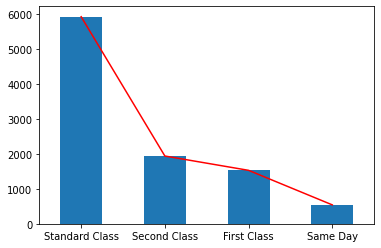

In [16]:
store_df['Ship Mode'].value_counts().plot.bar();
store_df['Ship Mode'].value_counts().plot(c='red');

It appears the that Standard Class has high number.

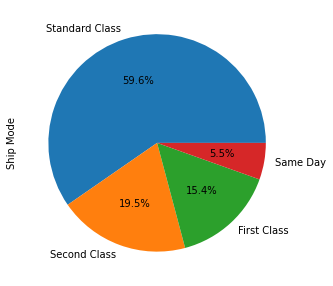

In [17]:
plt.figure(figsize=(5,5))
store_df['Ship Mode'].value_counts().plot.pie(autopct="%1.1f%%");
#plt.pie(store_df['Ship Mode'].value_counts());
#plt.title('Ship Mode');


### Segment

In [18]:
store_df['Segment'].value_counts()

Consumer       5160
Corporate      3008
Home Office    1776
Name: Segment, dtype: int64

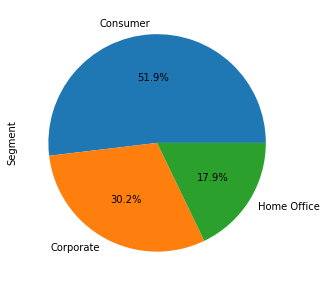

In [19]:
plt.figure(figsize=(5,5))
store_df['Segment'].value_counts().plot.pie(autopct="%1.1f%%");

<Figure size 2160x1800 with 0 Axes>

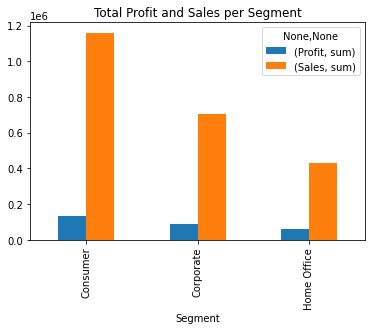

In [20]:
plt.figure(figsize=(30,25))
store_df.groupby('Segment')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Segment')
plt.show();

## State

In [21]:
top_state=store_df.State.value_counts().sort_values(ascending=False).head(15)
top_state

California        1980
New York          1119
Texas              980
Pennsylvania       581
Washington         502
Illinois           490
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Virginia           224
Arizona            224
Georgia            184
Tennessee          183
Colorado           182
Name: State, dtype: int64

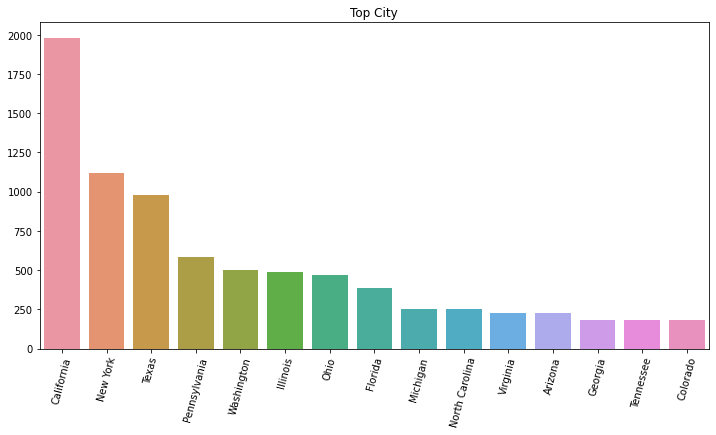

In [22]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top City' )
sns.barplot(top_state.index, top_state)
plt.ylabel("");

## City

In [23]:
top_cities = store_df.City.value_counts().sort_values(ascending=False).head(15)
top_cities

New York City    906
Los Angeles      734
Philadelphia     531
San Francisco    503
Seattle          424
Houston          373
Chicago          312
Columbus         221
San Diego        169
Springfield      163
Dallas           156
Jacksonville     125
Detroit          114
Newark            95
Richmond          90
Name: City, dtype: int64

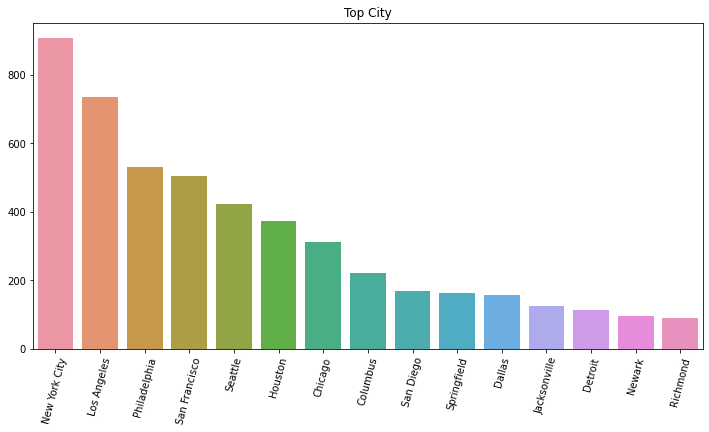

In [24]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top City' )
sns.barplot(top_cities.index, top_cities)
plt.ylabel("");

It appears the that a disproportionately high number of respondents are from New York City  & Los Angeles

<Figure size 1440x1080 with 0 Axes>

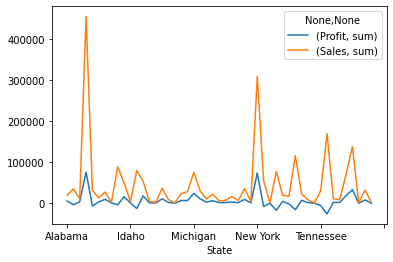

In [25]:
plt.figure(figsize=(20,15))
store_df.groupby((['State']))['Profit','Sales'].agg(['sum']).plot();

### Region

In [26]:
store_df.Region.value_counts()

West       3177
East       2832
Central    2315
South      1620
Name: Region, dtype: int64

<AxesSubplot:xlabel='Region'>

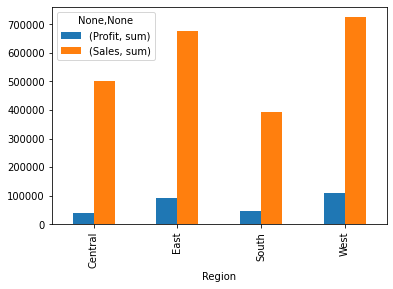

In [27]:
store_df.groupby('Region')['Profit','Sales'].agg(['sum']).plot(kind="bar")

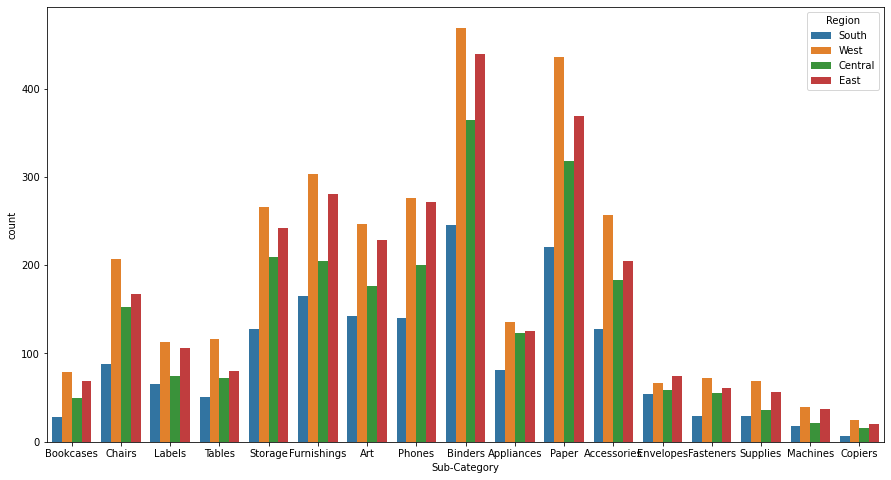

In [28]:
plt.figure(figsize=(15,8))
sns.countplot(x='Sub-Category',hue='Region',data=store_df);

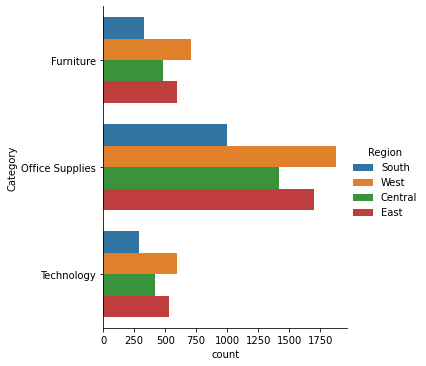

In [29]:
sns.catplot(y="Category",hue='Region',kind="count",data=store_df);

### Category

In [30]:
store_df.Category.value_counts()

Office Supplies    5986
Furniture          2114
Technology         1844
Name: Category, dtype: int64

<Figure size 2160x1800 with 0 Axes>

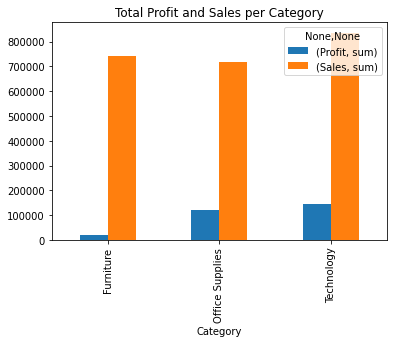

In [31]:
plt.figure(figsize=(30,25))
store_df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Category');


### Sub Category

In [32]:
store_df['Sub-Category'].value_counts()

Binders        1518
Paper          1344
Furnishings     954
Phones          888
Storage         845
Art             793
Accessories     773
Chairs          615
Appliances      466
Labels          359
Tables          319
Envelopes       254
Bookcases       226
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

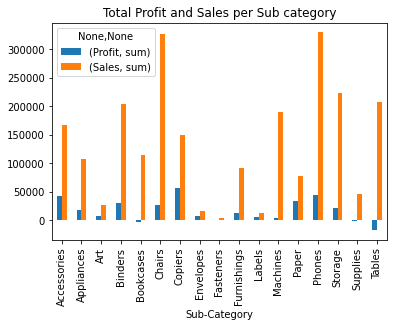

<Figure size 2160x1800 with 0 Axes>

In [33]:
#plt.figure(figsize=(30,25))
store_df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub category')
plt.figure(figsize=(30,25))
plt.show()

<AxesSubplot:ylabel='Sub-Category'>

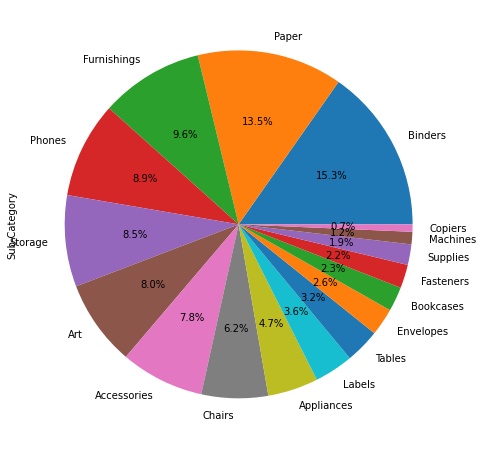

In [38]:
plt.figure(figsize=(8,8))
store_df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")

### Sales And Profit

<Figure size 1440x1080 with 0 Axes>

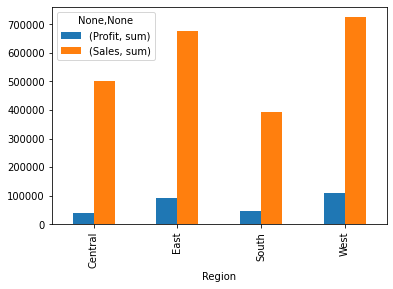

In [40]:
plt.figure(figsize=(20,15))
store_df.groupby((['Region']))['Profit','Sales'].agg(['sum']).plot.bar();

<Figure size 1440x1080 with 0 Axes>

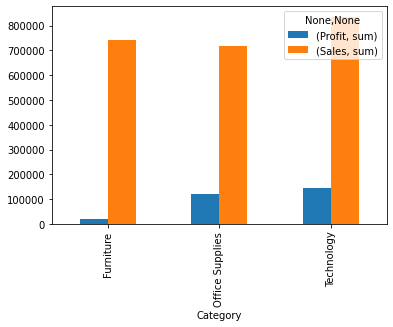

In [44]:
plt.figure(figsize=(20,15))

store_df.groupby((['Category']))['Profit','Sales'].agg(['sum']).plot.bar();

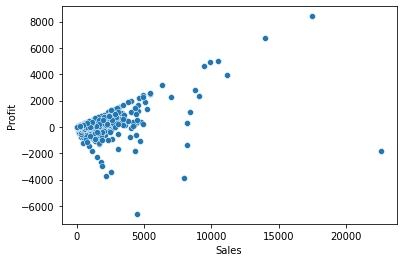

In [35]:
sns.scatterplot("Sales","Profit",data=store_df);

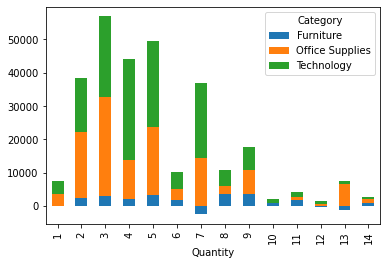

In [36]:
pd.crosstab(store_df['Quantity'],store_df['Category'],store_df['Profit'],aggfunc='sum').plot.bar(stacked=True);

###     ========================================================================================